In [1]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, XGBRegressor, plot_importance
from sklearn.preprocessing import label_binarize
from sklearn.utils import compute_sample_weight


import numpy as np
import lightgbm as lgb

In [2]:
X_train = np.load('XGB/X_train.npy')
X_test = np.load('XGB/X_test.npy')

y_train = np.load('XGB/y_train.npy')
y_test = np.load('XGB/y_test.npy')

# y_sequences_train = np.load('XGB/y_sequences_train.npy')
# y_sequences_test = np.load('XGB/y_sequences_test.npy')

# y_cluster_train = np.load('XGB/y_cluster_train.npy')
# y_cluster_test = np.load('XGB/y_cluster_test.npy')

# y_cluster_train[y_cluster_train > 0] = 1
# y_cluster_test[y_cluster_test > 0] = 1

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  

param_grid = {'C': [1], 'gamma': [0.01],'kernel': ['rbf']}
# param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train > 3)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=16.2min
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=16.1min
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=60.7min


In [ ]:
print(grid.best_estimator_)

grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

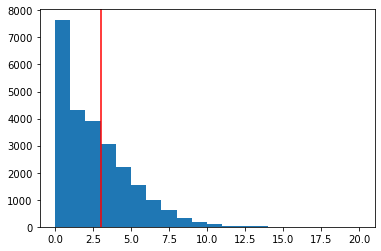

In [39]:
plt.hist(y_train, bins=20)
plt.axvline(x=3, color='red')

In [27]:
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
       'gamma': hp.uniform ('gamma', 1,9),
       'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
       'reg_lambda' : hp.uniform('reg_lambda', 0,1),
       'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
       'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
       'n_estimators': 180
      }

In [37]:
# Classifier:
def hyperparameter_tuning(space):
    model = XGBClassifier(n_estimators=space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                         reg_alpha = int(space['reg_alpha']), min_child_weight=space['min_child_weight'],
                         colsample_bytree=space['colsample_bytree'])
    evaluation = [(X_train, y_train > 3), (X_test, y_test > 3)]
    
    model.fit(X_train, y_train > 3,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)

    pred = model.predict_proba(X_test)[:, 1]
    auroc = roc_auc_score(y_test > 3, pred)
    print ("SCORE:", auroc)
    #change the metric if you like
    return {'loss': -auroc, 'status': STATUS_OK, 'model': model}

In [38]:
trials = Trials()
best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print (best)

  0%|                                   | 0/100 [00:00<?, ?trial/s, best loss=?]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.70952154822914                                                                
  1%|        | 1/100 [01:37<2:40:40, 97.38s/trial, best loss: -0.70952154822914]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7128557445381264                                                              
  2%|      | 2/100 [03:08<2:32:57, 93.64s/trial, best loss: -0.7128557445381264]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7148415531529008                                                              
  3%|▏     | 3/100 [04:39<2:29:17, 92.34s/trial, best loss: -0.7148415531529008]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7159067681382991                                                              
  4%|▏     | 4/100 [05:21<1:56:20, 72.71s/trial, best loss: -0.7159067681382991]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7129883670505544                                                              
  5%|▎     | 5/100 [06:33<1:54:48, 72.51s/trial, best loss: -0.7159067681382991]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.718377400615696                                                               
  6%|▍      | 6/100 [07:05<1:31:37, 58.49s/trial, best loss: -0.718377400615696]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7076353300161942                                                              
  7%|▍      | 7/100 [08:00<1:29:10, 57.54s/trial, best loss: -0.718377400615696]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7099116518088046                                                              
  8%|▌      | 8/100 [09:52<1:54:27, 74.64s/trial, best loss: -0.718377400615696]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7132703398750088                                                              
  9%|▋      | 9/100 [10:44<1:42:30, 67.59s/trial, best loss: -0.718377400615696]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7184097269119664                                                              
 10%|▌    | 10/100 [12:59<2:12:55, 88.62s/trial, best loss: -0.7184097269119664]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7162050452737543                                                              
 11%|▌    | 11/100 [14:08<2:02:36, 82.65s/trial, best loss: -0.7184097269119664]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7107352665493697                                                              
 12%|▌    | 12/100 [15:08<1:50:58, 75.66s/trial, best loss: -0.7184097269119664]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7159589278172156                                                              
 13%|▋    | 13/100 [16:37<1:55:29, 79.65s/trial, best loss: -0.7184097269119664]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7110496362515273                                                              
 14%|▋    | 14/100 [17:15<1:36:12, 67.12s/trial, best loss: -0.7184097269119664]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7124539950220327                                                              
 15%|▊    | 15/100 [18:22<1:34:48, 66.93s/trial, best loss: -0.7184097269119664]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7138222160988908                                                              
 16%|▊    | 16/100 [19:46<1:41:06, 72.22s/trial, best loss: -0.7184097269119664]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7170923950482325                                                              
 17%|▊    | 17/100 [20:46<1:34:37, 68.40s/trial, best loss: -0.7184097269119664]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7082870083862036                                                              
 18%|▉    | 18/100 [21:57<1:34:30, 69.15s/trial, best loss: -0.7184097269119664]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7163008242782061                                                              
 19%|▉    | 19/100 [23:55<1:53:22, 83.98s/trial, best loss: -0.7184097269119664]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7083922453026644                                                              
 20%|█    | 20/100 [24:40<1:36:17, 72.22s/trial, best loss: -0.7184097269119664]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7118775564594998                                                              
 21%|█    | 21/100 [25:00<1:14:20, 56.46s/trial, best loss: -0.7184097269119664]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7141841576868262                                                              
 22%|█    | 22/100 [26:11<1:19:01, 60.79s/trial, best loss: -0.7184097269119664]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7191633954525231                                                              
 23%|█▏   | 23/100 [27:18<1:20:31, 62.75s/trial, best loss: -0.7191633954525231]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7219402101858607                                                              
 24%|█▏   | 24/100 [28:18<1:18:34, 62.03s/trial, best loss: -0.7219402101858607]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7130021304299708                                                              
 25%|█▎   | 25/100 [29:20<1:17:26, 61.96s/trial, best loss: -0.7219402101858607]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7130066476416766                                                              
 26%|█▎   | 26/100 [29:52<1:05:14, 52.90s/trial, best loss: -0.7219402101858607]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7198213555700608                                                              
 27%|█▎   | 27/100 [31:02<1:10:32, 57.98s/trial, best loss: -0.7219402101858607]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7192059560565646                                                              
 28%|█▍   | 28/100 [32:24<1:18:21, 65.31s/trial, best loss: -0.7219402101858607]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7156691204537088                                                              
 29%|█▍   | 29/100 [33:18<1:13:13, 61.87s/trial, best loss: -0.7219402101858607]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7197590321648059                                                              
 30%|█▌   | 30/100 [35:08<1:29:14, 76.50s/trial, best loss: -0.7219402101858607]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7156767432484625                                                              
 31%|█▌   | 31/100 [35:49<1:15:36, 65.75s/trial, best loss: -0.7219402101858607]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7181644564326224                                                              
 32%|█▌   | 32/100 [36:33<1:07:11, 59.29s/trial, best loss: -0.7219402101858607]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7130389033565141                                                              
 33%|█▋   | 33/100 [37:56<1:14:04, 66.33s/trial, best loss: -0.7219402101858607]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.71718612719113                                                                
 34%|█▋   | 34/100 [39:22<1:19:33, 72.33s/trial, best loss: -0.7219402101858607]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7164458691228253                                                              
 35%|█▊   | 35/100 [40:38<1:19:14, 73.15s/trial, best loss: -0.7219402101858607]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7182557182253682                                                              
 36%|█▊   | 36/100 [41:46<1:16:33, 71.77s/trial, best loss: -0.7219402101858607]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7147097070362348                                                              
 37%|█▊   | 37/100 [42:35<1:08:19, 65.07s/trial, best loss: -0.7219402101858607]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7153403521392385                                                              
 38%|█▉   | 38/100 [43:50<1:10:13, 67.97s/trial, best loss: -0.7219402101858607]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7180899224394749                                                              
 39%|█▉   | 39/100 [44:34<1:01:39, 60.64s/trial, best loss: -0.7219402101858607]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7191502673060027                                                              
 40%|██▊    | 40/100 [45:20<56:11, 56.20s/trial, best loss: -0.7219402101858607]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7158073894807692                                                              
 41%|██▊    | 41/100 [46:03<51:22, 52.25s/trial, best loss: -0.7219402101858607]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7150084782417205                                                              
 42%|██▉    | 42/100 [47:02<52:36, 54.42s/trial, best loss: -0.7219402101858607]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7100847880637198                                                              
 43%|███    | 43/100 [48:11<55:50, 58.78s/trial, best loss: -0.7219402101858607]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7115833730471529                                                              
 44%|███    | 44/100 [48:43<47:26, 50.83s/trial, best loss: -0.7219402101858607]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7143727512755478                                                              
 45%|███▏   | 45/100 [50:11<56:49, 61.99s/trial, best loss: -0.7219402101858607]

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



 45%|██▎  | 45/100 [50:33<1:01:47, 67.40s/trial, best loss: -0.7219402101858607]


KeyboardInterrupt: 

In [21]:
(y_train > 50).sum() / len(y_train)

0.036072144288577156

In [79]:

sample_weight = compute_sample_weight('balanced', y_cluster_train)

model = XGBClassifier(max_depth=2, n_estimators=500, learning_rate=1e-1)

eval_set = [(X_test, y_cluster_test)]
# eval_set = [(X_test, y_cluster_test)]

model.fit(X_train, y_cluster_train, eval_metric="auc", \
          early_stopping_rounds=20, eval_set=eval_set, \
          verbose=True, sample_weight=sample_weight)

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.70812
[1]	validation_0-auc:0.74100
[2]	validation_0-auc:0.73970
[3]	validation_0-auc:0.74685
[4]	validation_0-auc:0.75579
[5]	validation_0-auc:0.75005
[6]	validation_0-auc:0.75497
[7]	validation_0-auc:0.75972
[8]	validation_0-auc:0.75591
[9]	validation_0-auc:0.76181
[10]	validation_0-auc:0.76396
[11]	validation_0-auc:0.76871
[12]	validation_0-auc:0.77050
[13]	validation_0-auc:0.76909
[14]	validation_0-auc:0.77273
[15]	validation_0-auc:0.77131
[16]	validation_0-auc:0.77451
[17]	validation_0-auc:0.77593
[18]	validation_0-auc:0.77896
[19]	validation_0-auc:0.77989
[20]	validation_0-auc:0.78105
[21]	validation_0-auc:0.78322
[22]	validation_0-auc:0.78482
[23]	validation_0-auc:0.78526
[24]	validation_0-auc:0.78627
[25]	validation_0-auc:0.78773
[26]	validation_0-auc:0.78871
[27]	validation_0-auc:0.78901
[28]	validation_0-auc:0.78893
[29]	validation_0-auc:0.79096
[30]	validation_0-auc:0.79202
[31]	validation_0-auc:0.79153
[32]	validation_0-auc:0.79211
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [81]:
confusion_matrix(model.predict(X_test), y_cluster_test)

array([[ 27,   3,   8,  36],
       [  1,   0,   0,   2],
       [  6,   0,  86,  79],
       [  4,   2,  37, 333]])

In [108]:
# roc_auc_score(model.predict(X_test), y_cluster_test, multi_class='ovr')

roc_auc_score(label_binarize(model.predict(X_test), classes=range(4)), \
              label_binarize(y_cluster_test, classes=range(4)), average='micro')

0.8098290598290598

In [85]:
for i in range(len(np.unique(y_cluster_train))):
    try:
        print(i, roc_auc_score(model.predict(X_test) == i, y_cluster_test == i))#, multi_class='ovo')
    except:
        print("An exception occurred")

0 0.6724324324324324
1 0.49597423510466987
2 0.7017931141319083
3 0.7069320521619766


In [38]:
# model = XGBRegressor(max_depth=2, n_estimators=100, learning_rate=1e-1)

# eval_set = [(X_test, y_test)]
# # eval_set = [(X_test, y_cluster_test)]

# model.fit(X_train, y_train, eval_metric="mae", early_stopping_rounds=10, eval_set=eval_set, verbose=True)

In [123]:
(y_test > 30).sum() / len(y_test)

0.3060897435897436

In [28]:
sample_weight = compute_sample_weight('balanced', y_train > 3)

model = XGBClassifier(max_depth=2, n_estimators=1000, learning_rate=1e-1)

eval_set = [(X_test, y_test > 3)]
# eval_set = [(X_test, y_cluster_test)]

model.fit(X_train, y_train > 3, eval_metric="auc", \
          early_stopping_rounds=20, eval_set=eval_set, \
          verbose=True, sample_weight=sample_weight)

[0]	validation_0-auc:0.62998
[1]	validation_0-auc:0.65218
[2]	validation_0-auc:0.65581
[3]	validation_0-auc:0.67328
[4]	validation_0-auc:0.67293
[5]	validation_0-auc:0.67409
[6]	validation_0-auc:0.67490
[7]	validation_0-auc:0.67420
[8]	validation_0-auc:0.67406
[9]	validation_0-auc:0.67745
[10]	validation_0-auc:0.68228
[11]	validation_0-auc:0.68643
[12]	validation_0-auc:0.68912
[13]	validation_0-auc:0.69122
[14]	validation_0-auc:0.69130
[15]	validation_0-auc:0.69291
[16]	validation_0-auc:0.69459
[17]	validation_0-auc:0.69538
[18]	validation_0-auc:0.69605
[19]	validation_0-auc:0.69698
[20]	validation_0-auc:0.69718
[21]	validation_0-auc:0.69741
[22]	validation_0-auc:0.69753
[23]	validation_0-auc:0.69781
[24]	validation_0-auc:0.69998
[25]	validation_0-auc:0.70068
[26]	validation_0-auc:0.70144
[27]	validation_0-auc:0.70125
[28]	validation_0-auc:0.70173
[29]	validation_0-auc:0.70174
[30]	validation_0-auc:0.70352
[31]	validation_0-auc:0.70487
[32]	validation_0-auc:0.70530
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
from sklearn.feature_selection import SelectFromModel

thresholds = np.sort(model.feature_importances_)
for thresh in thresholds[thresholds > 0]:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    
    select_X_test = selection.transform(X_test)
    eval_set = [(select_X_test, y_test > 3)]
    # train model
    selection_model = XGBClassifier(max_depth=2, n_estimators=1000, learning_rate=1e-1)
    selection_model.fit(select_X_train, y_train > 3, eval_metric="auc", \
                        early_stopping_rounds=20, eval_set=eval_set, \
                        verbose=False, sample_weight=sample_weight)
    print(roc_auc_score(y_test > 3, selection_model.predict_proba(select_X_test)[:, 1]))

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option us

0.7187609401221002


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7187609401221002


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7187835967620627


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7187835967620627


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7187279785929337


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7187279785929337


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7187279785929337


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7187279785929337


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7187279785929337


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7187279785929337


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.720952493613792


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7214757137759147


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7214474812027528


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7218616530510377


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7218946145802042


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.720774628402872


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.720908733125391


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7218919324857538


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7208951814902733


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7216879521446592


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7220753736298732


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7216894343547502


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.721811116745078


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7211611323294582


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7201149743309444


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.718878952277917


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7215848326711854


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7207856391064051


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7216299342068115


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7216299342068115


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7206727088137577


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7214891948295995


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7211097490463036


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7216453915406176


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7216453915406176


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7210246278382206


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7210246278382206


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7211532977904059


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7217934713868517


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7225815130852329


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7209177675488029


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.7215630230084177


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option us

0.7219819943941403


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7212859203028338


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7215154511226399


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7212403952786104


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7161199946471041


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7184328070405261


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7203444345693177


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7213402680061705


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7209229905748378


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.721841396179794


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7215902674415191


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.720586528884181


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7208303877348669


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7199406381916699


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7199406381916699


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.721959267172745


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7216583079428391


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7223078688698614


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7226317670654612


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7216609194558566


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7229802981811447


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7220637276934438


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7225803837823066


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7224524902258831


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7224524902258831


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.723070501252397


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7226861853502307


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.723162327696606


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7228100557649785


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7229195275674137


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7224188934638205


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7235310451021002


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7218397728068372


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7231444705940812


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7221978324159629


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7232671411244695


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7237643167378504


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7234632163450788


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7228594627680118


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7223944722880355


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7229437369989


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7228391353153353


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7232960795119604


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.722741521193628


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7224646302323428


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7210069118985615


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7210069118985615


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7222040435820586


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7232716583361753


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.722588924135688


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7243937619564946


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7243636942660773


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7244193124352063


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7239051972779282


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7239764845251621


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7245308310991957


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7243028530709135


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7242879603885705


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7236044497923212


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7242271191934067


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7246694530334206


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7243651764761683


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7239374529927657


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7244704133926294


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.725001044605207


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7228773904519696


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7228246661215898


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7225076143249819


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7220231433695237


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7223863554232515


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7232846453198299


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7233394870931968


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7225899828571816


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7212774505308853


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7232247216832937


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7232350971539308


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.722669598713498


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7236112256098801


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7234864376365044


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7227813997032192


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7226671283633465


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7216137004772434


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7218553713035092


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7214498809714716


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7207756165429327


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7204721869628753


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7191790645306277


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7188727411118213


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7214939237856041


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7207690524696726


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.723455734713191


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7156618505661195


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7171583181065656


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7166059478126531


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7170785610873833


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7175065668965174


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7172787300311011


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7171196394813338


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7140096803846858


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7134139730909699


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7129872377476278


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7139743896682333


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.713968037339272


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7152072355567802


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7135261269878554


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7134587923008644


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7129011283994842


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7125628315915719


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7090303014561232


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7033610596023498


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7031407043688214


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.6961941503237712


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.6971146027902817


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.6968889539492853


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.6959880525396894


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.6956371216552871


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.6915022495714296


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.6943311534022509


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.6834444614467274


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.6817530479885986


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.6815242229831214


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.6784808927591356


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.6755267068849082


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.6730741432543349


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.6685338514198725


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.6692336663271229


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.6709013644237957


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.6686988002285709


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.6648347491027687


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.6629776104401797


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.663910061750284


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.6613670833041598


/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jamienor

0.6380328615858576
0.6372786989752706
0.6325583539054683


In [21]:
from xgboost import XGBClassifier

for max_depth in [2, 4, 6]:
    for n_estimators in [50, 100, 200]:
        model = XGBClassifier(max_depth=max_depth, n_estimators=n_estimators)

        eval_set = [(X_test, y_test > 3)]
        # eval_set = [(X_test, y_cluster_test)]

        model.fit(X_train, y_train > 3, eval_metric="auc", early_stopping_rounds=10, eval_set=eval_set, verbose=True)
        # model.fit(X_train, y_cluster_train, eval_metric="auc", early_stopping_rounds=50, eval_set=eval_set, verbose=True)


        # y_pred = model.predict(X_test)

[0]	validation_0-auc:0.62998
[1]	validation_0-auc:0.66346
[2]	validation_0-auc:0.67277
[3]	validation_0-auc:0.67277
[4]	validation_0-auc:0.68117
[5]	validation_0-auc:0.68602
[6]	validation_0-auc:0.68888
[7]	validation_0-auc:0.69126
[8]	validation_0-auc:0.69503
[9]	validation_0-auc:0.69766
[10]	validation_0-auc:0.69747
[11]	validation_0-auc:0.69814
[12]	validation_0-auc:0.70098
[13]	validation_0-auc:0.70223
[14]	validation_0-auc:0.70369
[15]	validation_0-auc:0.70609
[16]	validation_0-auc:0.70647
[17]	validation_0-auc:0.70707
[18]	validation_0-auc:0.71054
[19]	validation_0-auc:0.71201
[20]	validation_0-auc:0.71252
[21]	validation_0-auc:0.71279
[22]	validation_0-auc:0.71230
[23]	validation_0-auc:0.71264
[24]	validation_0-auc:0.71312
[25]	validation_0-auc:0.71289
[26]	validation_0-auc:0.71368
[27]	validation_0-auc:0.71392
[28]	validation_0-auc:0.71375
[29]	validation_0-auc:0.71403
[30]	validation_0-auc:0.71380
[31]	validation_0-auc:0.71400
[32]	validation_0-auc:0.71390
[33]	validation_0-au

[6]	validation_0-auc:0.70472
[7]	validation_0-auc:0.70470
[8]	validation_0-auc:0.70645
[9]	validation_0-auc:0.70547
[10]	validation_0-auc:0.70660
[11]	validation_0-auc:0.70515
[12]	validation_0-auc:0.70286
[13]	validation_0-auc:0.70334
[14]	validation_0-auc:0.70617
[15]	validation_0-auc:0.70652
[16]	validation_0-auc:0.70599
[17]	validation_0-auc:0.70504
[18]	validation_0-auc:0.70385
[19]	validation_0-auc:0.70249
[20]	validation_0-auc:0.70306
[0]	validation_0-auc:0.66543
[1]	validation_0-auc:0.68434
[2]	validation_0-auc:0.69373
[3]	validation_0-auc:0.69930
[4]	validation_0-auc:0.70139
[5]	validation_0-auc:0.70124
[6]	validation_0-auc:0.70472
[7]	validation_0-auc:0.70470
[8]	validation_0-auc:0.70645
[9]	validation_0-auc:0.70547
[10]	validation_0-auc:0.70660
[11]	validation_0-auc:0.70515
[12]	validation_0-auc:0.70286
[13]	validation_0-auc:0.70334
[14]	validation_0-auc:0.70617
[15]	validation_0-auc:0.70652
[16]	validation_0-auc:0.70599
[17]	validation_0-auc:0.70504
[18]	validation_0-auc:0.

In [51]:
from sklearn.metrics import mean_squared_error

hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}

gbm = lgb.LGBMRegressor(**hyper_params)#, device_type='gpu')

gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=100,
        )

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.958998 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] fe

[73]	valid_0's l1: 1.70996	valid_0's l2: 4.70046
[74]	valid_0's l1: 1.70919	valid_0's l2: 4.69698
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[75]	valid_0's l1: 1.70842	valid_0's l2: 4.69328
[76]	valid_0's l1: 1.70772	valid_0's l2: 4.68999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[77]	valid_0's l1: 1.70688	valid_0's l2: 4.68624
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[78]	valid_0's l1: 1.70614	valid_0's l2: 4.68299
[79]	valid_0's l1: 1.70553	valid_0's l2: 4.68013
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[80]	valid_0's l1: 1.70479	valid_0's l2: 4.67662
[81]	valid_0's l1: 1.70388	valid_0's l2: 4.67247
[82]	valid_0's l1: 1.70313	valid_0's l2: 4.66904
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[83]	valid_0's l1: 1.70224	valid_0's l2: 4.66492
[84]	valid_0's l1: 1.70148	valid_0's l2: 4.66141
[85]	valid_0's l1: 1.70063	valid_0's 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[155]	valid_0's l1: 1.65029	valid_0's l2: 4.45119
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[156]	valid_0's l1: 1.64975	valid_0's l2: 4.44909
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[157]	valid_0's l1: 1.64921	valid_0's l2: 4.44729
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[158]	valid_0's l1: 1.64875	valid_0's l2: 4.44554
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[159]	valid_0's l1: 1.64822	valid_0's l2: 4.44361
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[160]	valid_0's l1: 1.64772	valid_0's l2: 4.44181
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[161]	valid_0's l1: 1.64719	valid_0's l2: 4.43996
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[162]	valid_0's l1: 1.64663	valid_0's l2: 4.43778


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[225]	valid_0's l1: 1.61658	valid_0's l2: 4.32823
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[226]	valid_0's l1: 1.61613	valid_0's l2: 4.32654
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[227]	valid_0's l1: 1.6158	valid_0's l2: 4.32542
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[228]	valid_0's l1: 1.61535	valid_0's l2: 4.3236
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[229]	valid_0's l1: 1.61481	valid_0's l2: 4.3217
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[230]	valid_0's l1: 1.61444	valid_0's l2: 4.32039
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[231]	valid_0's l1: 1.6141	valid_0's l2: 4.31919
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[232]	valid_0's l1: 1.61377	valid_0's l2: 4.31791
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[292]	valid_0's l1: 1.59579	valid_0's l2: 4.25086
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[293]	valid_0's l1: 1.59548	valid_0's l2: 4.24962
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[294]	valid_0's l1: 1.59522	valid_0's l2: 4.24852
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[295]	valid_0's l1: 1.59499	valid_0's l2: 4.24756
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[296]	valid_0's l1: 1.59486	valid_0's l2: 4.24704
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[297]	valid_0's l1: 1.59457	valid_0's l2: 4.2458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[298]	valid_0's l1: 1.5943	valid_0's l2: 4.24471
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[299]	valid_0's l1: 1.59407	valid_0's l2: 4.2438
[Li

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[359]	valid_0's l1: 1.58219	valid_0's l2: 4.19773
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[360]	valid_0's l1: 1.582	valid_0's l2: 4.19707
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[361]	valid_0's l1: 1.58175	valid_0's l2: 4.1962
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[362]	valid_0's l1: 1.58158	valid_0's l2: 4.19569
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[363]	valid_0's l1: 1.5815	valid_0's l2: 4.19547
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[364]	valid_0's l1: 1.58128	valid_0's l2: 4.19486
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[365]	valid_0's l1: 1.5811	valid_0's l2: 4.19419
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[366]	valid_0's l1: 1.58099	valid_0's l2: 4.19379
[Ligh

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[430]	valid_0's l1: 1.57217	valid_0's l2: 4.1622
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[431]	valid_0's l1: 1.57206	valid_0's l2: 4.16188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[432]	valid_0's l1: 1.572	valid_0's l2: 4.16156
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[433]	valid_0's l1: 1.57189	valid_0's l2: 4.16105
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[434]	valid_0's l1: 1.57176	valid_0's l2: 4.16065
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[435]	valid_0's l1: 1.57174	valid_0's l2: 4.16054
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[436]	valid_0's l1: 1.57167	valid_0's l2: 4.16034
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[437]	valid_0's l1: 1.57156	valid_0's l2: 4.15987
[Li

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[497]	valid_0's l1: 1.56467	valid_0's l2: 4.13556
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[498]	valid_0's l1: 1.56461	valid_0's l2: 4.13535
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[499]	valid_0's l1: 1.56457	valid_0's l2: 4.1352
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[500]	valid_0's l1: 1.56449	valid_0's l2: 4.13486
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[501]	valid_0's l1: 1.56437	valid_0's l2: 4.1345
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[502]	valid_0's l1: 1.56432	valid_0's l2: 4.13445
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[503]	valid_0's l1: 1.56428	valid_0's l2: 4.13439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[504]	valid_0's l1: 1.56419	valid_0's l2: 4.13408
[L

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[563]	valid_0's l1: 1.56037	valid_0's l2: 4.12178
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[564]	valid_0's l1: 1.56028	valid_0's l2: 4.12152
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[565]	valid_0's l1: 1.56018	valid_0's l2: 4.12109
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[566]	valid_0's l1: 1.56006	valid_0's l2: 4.12062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[567]	valid_0's l1: 1.55997	valid_0's l2: 4.12024
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[568]	valid_0's l1: 1.55984	valid_0's l2: 4.11975
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[569]	valid_0's l1: 1.5597	valid_0's l2: 4.11931
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[570]	valid_0's l1: 1.55964	valid_0's l2: 4.11892
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[630]	valid_0's l1: 1.55669	valid_0's l2: 4.10804
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[631]	valid_0's l1: 1.55666	valid_0's l2: 4.10795
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[632]	valid_0's l1: 1.55662	valid_0's l2: 4.10787
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[633]	valid_0's l1: 1.5566	valid_0's l2: 4.10786
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[634]	valid_0's l1: 1.55655	valid_0's l2: 4.10766
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[635]	valid_0's l1: 1.55651	valid_0's l2: 4.10755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[636]	valid_0's l1: 1.55643	valid_0's l2: 4.10719
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[637]	valid_0's l1: 1.55639	valid_0's l2: 4.10694
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[697]	valid_0's l1: 1.55298	valid_0's l2: 4.09466
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[698]	valid_0's l1: 1.55299	valid_0's l2: 4.0947
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[699]	valid_0's l1: 1.55289	valid_0's l2: 4.09426
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[700]	valid_0's l1: 1.5529	valid_0's l2: 4.09438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[701]	valid_0's l1: 1.55289	valid_0's l2: 4.09439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[702]	valid_0's l1: 1.55285	valid_0's l2: 4.09422
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[703]	valid_0's l1: 1.55285	valid_0's l2: 4.09416
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[704]	valid_0's l1: 1.55277	valid_0's l2: 4.094
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[763]	valid_0's l1: 1.5503	valid_0's l2: 4.08498
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[764]	valid_0's l1: 1.55025	valid_0's l2: 4.08456
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[765]	valid_0's l1: 1.55022	valid_0's l2: 4.08442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[766]	valid_0's l1: 1.55021	valid_0's l2: 4.08438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[767]	valid_0's l1: 1.55018	valid_0's l2: 4.08423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[768]	valid_0's l1: 1.55021	valid_0's l2: 4.08426
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[769]	valid_0's l1: 1.55023	valid_0's l2: 4.08429
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[770]	valid_0's l1: 1.55022	valid_0's l2: 4.08413
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[829]	valid_0's l1: 1.54877	valid_0's l2: 4.07887
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[830]	valid_0's l1: 1.54875	valid_0's l2: 4.07891
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[831]	valid_0's l1: 1.54877	valid_0's l2: 4.07907
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[832]	valid_0's l1: 1.54879	valid_0's l2: 4.07927
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[833]	valid_0's l1: 1.5488	valid_0's l2: 4.07941
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[834]	valid_0's l1: 1.54881	valid_0's l2: 4.0795
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[835]	valid_0's l1: 1.54885	valid_0's l2: 4.07965
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[836]	valid_0's l1: 1.54885	valid_0's l2: 4.07969
[L

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[895]	valid_0's l1: 1.54799	valid_0's l2: 4.078
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[896]	valid_0's l1: 1.548	valid_0's l2: 4.07806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[897]	valid_0's l1: 1.54798	valid_0's l2: 4.07803
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[898]	valid_0's l1: 1.54799	valid_0's l2: 4.07807
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[899]	valid_0's l1: 1.54799	valid_0's l2: 4.07809
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[900]	valid_0's l1: 1.54795	valid_0's l2: 4.07791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[901]	valid_0's l1: 1.54793	valid_0's l2: 4.07782
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[902]	valid_0's l1: 1.54787	valid_0's l2: 4.07753
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[961]	valid_0's l1: 1.54545	valid_0's l2: 4.06932
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[962]	valid_0's l1: 1.54541	valid_0's l2: 4.06914
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[963]	valid_0's l1: 1.54541	valid_0's l2: 4.06919
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[964]	valid_0's l1: 1.54537	valid_0's l2: 4.06908
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[965]	valid_0's l1: 1.54539	valid_0's l2: 4.06924
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[966]	valid_0's l1: 1.54534	valid_0's l2: 4.06913
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[967]	valid_0's l1: 1.54534	valid_0's l2: 4.06918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[968]	valid_0's l1: 1.54529	valid_0's l2: 4.0691
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1027]	valid_0's l1: 1.54423	valid_0's l2: 4.06518
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1028]	valid_0's l1: 1.54423	valid_0's l2: 4.06522
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1029]	valid_0's l1: 1.54417	valid_0's l2: 4.06492
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1030]	valid_0's l1: 1.54417	valid_0's l2: 4.06491
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1031]	valid_0's l1: 1.54415	valid_0's l2: 4.06456
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1032]	valid_0's l1: 1.5441	valid_0's l2: 4.06446
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1033]	valid_0's l1: 1.54408	valid_0's l2: 4.06429
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1034]	valid_0's l1: 1.54408	valid_0's l2: 4

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1093]	valid_0's l1: 1.54315	valid_0's l2: 4.06234
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1094]	valid_0's l1: 1.54312	valid_0's l2: 4.06224
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1095]	valid_0's l1: 1.5431	valid_0's l2: 4.06218
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1096]	valid_0's l1: 1.54309	valid_0's l2: 4.06215
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1097]	valid_0's l1: 1.54309	valid_0's l2: 4.06217
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1098]	valid_0's l1: 1.54309	valid_0's l2: 4.0622
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1099]	valid_0's l1: 1.54305	valid_0's l2: 4.06207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1100]	valid_0's l1: 1.543	valid_0's l2: 4.06

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1159]	valid_0's l1: 1.54244	valid_0's l2: 4.06067
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1160]	valid_0's l1: 1.54244	valid_0's l2: 4.06063
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1161]	valid_0's l1: 1.54247	valid_0's l2: 4.06062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1162]	valid_0's l1: 1.54246	valid_0's l2: 4.06054
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1163]	valid_0's l1: 1.54249	valid_0's l2: 4.06062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1164]	valid_0's l1: 1.54248	valid_0's l2: 4.06057
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1165]	valid_0's l1: 1.54251	valid_0's l2: 4.06066
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1166]	valid_0's l1: 1.54248	valid_0's l2: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1226]	valid_0's l1: 1.54197	valid_0's l2: 4.05828
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1227]	valid_0's l1: 1.542	valid_0's l2: 4.05835
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1228]	valid_0's l1: 1.542	valid_0's l2: 4.05834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1229]	valid_0's l1: 1.54202	valid_0's l2: 4.05836
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1230]	valid_0's l1: 1.54198	valid_0's l2: 4.05819
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1231]	valid_0's l1: 1.542	valid_0's l2: 4.05825
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1232]	valid_0's l1: 1.54199	valid_0's l2: 4.05821
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1233]	valid_0's l1: 1.54199	valid_0's l2: 4.0583

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1293]	valid_0's l1: 1.54155	valid_0's l2: 4.05625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1294]	valid_0's l1: 1.54151	valid_0's l2: 4.05621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1295]	valid_0's l1: 1.5415	valid_0's l2: 4.05618
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1296]	valid_0's l1: 1.54147	valid_0's l2: 4.05592
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1297]	valid_0's l1: 1.54141	valid_0's l2: 4.05571
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1298]	valid_0's l1: 1.54138	valid_0's l2: 4.05564
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1299]	valid_0's l1: 1.54133	valid_0's l2: 4.05542
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1300]	valid_0's l1: 1.5413	valid_0's l2: 4.

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1360]	valid_0's l1: 1.54004	valid_0's l2: 4.05193
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1361]	valid_0's l1: 1.54004	valid_0's l2: 4.05203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1362]	valid_0's l1: 1.54003	valid_0's l2: 4.052
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1363]	valid_0's l1: 1.54003	valid_0's l2: 4.05205
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1364]	valid_0's l1: 1.54001	valid_0's l2: 4.05206
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1365]	valid_0's l1: 1.53998	valid_0's l2: 4.05197
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1366]	valid_0's l1: 1.53997	valid_0's l2: 4.05186
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1367]	valid_0's l1: 1.53997	valid_0's l2: 4.

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1428]	valid_0's l1: 1.53918	valid_0's l2: 4.04951
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1429]	valid_0's l1: 1.5392	valid_0's l2: 4.04953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1430]	valid_0's l1: 1.53919	valid_0's l2: 4.0495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1431]	valid_0's l1: 1.53921	valid_0's l2: 4.04966
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1432]	valid_0's l1: 1.5392	valid_0's l2: 4.0497
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1433]	valid_0's l1: 1.5392	valid_0's l2: 4.04983
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1434]	valid_0's l1: 1.5392	valid_0's l2: 4.04978
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1435]	valid_0's l1: 1.53921	valid_0's l2: 4.0498

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1495]	valid_0's l1: 1.53894	valid_0's l2: 4.04892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1496]	valid_0's l1: 1.53895	valid_0's l2: 4.0489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1497]	valid_0's l1: 1.53896	valid_0's l2: 4.04893
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1498]	valid_0's l1: 1.53896	valid_0's l2: 4.0489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1499]	valid_0's l1: 1.53896	valid_0's l2: 4.04891
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1500]	valid_0's l1: 1.53897	valid_0's l2: 4.04892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1501]	valid_0's l1: 1.53896	valid_0's l2: 4.04895
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1502]	valid_0's l1: 1.53896	valid_0's l2: 4.

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1561]	valid_0's l1: 1.53817	valid_0's l2: 4.04757
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1562]	valid_0's l1: 1.53814	valid_0's l2: 4.04756
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1563]	valid_0's l1: 1.53809	valid_0's l2: 4.04753
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1564]	valid_0's l1: 1.53809	valid_0's l2: 4.04759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1565]	valid_0's l1: 1.53804	valid_0's l2: 4.04746
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1566]	valid_0's l1: 1.53799	valid_0's l2: 4.04734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1567]	valid_0's l1: 1.53794	valid_0's l2: 4.04721
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1568]	valid_0's l1: 1.53792	valid_0's l2: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1627]	valid_0's l1: 1.53746	valid_0's l2: 4.04662
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1628]	valid_0's l1: 1.53747	valid_0's l2: 4.04654
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1629]	valid_0's l1: 1.53743	valid_0's l2: 4.04645
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1630]	valid_0's l1: 1.53743	valid_0's l2: 4.04643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1631]	valid_0's l1: 1.53744	valid_0's l2: 4.04655
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1632]	valid_0's l1: 1.53747	valid_0's l2: 4.04662
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1633]	valid_0's l1: 1.53749	valid_0's l2: 4.04664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1634]	valid_0's l1: 1.53749	valid_0's l2: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1695]	valid_0's l1: 1.53763	valid_0's l2: 4.04689
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1696]	valid_0's l1: 1.5376	valid_0's l2: 4.0468
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1697]	valid_0's l1: 1.53758	valid_0's l2: 4.04682
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1698]	valid_0's l1: 1.53756	valid_0's l2: 4.04687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1699]	valid_0's l1: 1.53755	valid_0's l2: 4.04689
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1700]	valid_0's l1: 1.53754	valid_0's l2: 4.04681
Early stopping, best iteration is:
[1600]	valid_0's l1: 1.53766	valid_0's l2: 4.04643


LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
              learning_rate=0.005, max_bin=512, max_depth=8, metric=['l2'],
              n_estimators=1000, num_iterations=100000, num_leaves=128,
              objective='regression', task='train', verbose=0)

In [57]:
confusion_matrix(gbm.predict(X_test) > 3, y_test > 3)

array([[4150,  909],
       [ 598,  583]])

In [3]:
from sklearn.metrics import roc_auc_score

hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'is_unbalance': True,
    'metric': ['f1'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}

gbm = lgb.LGBMClassifier(**hyper_params)

gbm.fit(X_train, y_train > 3,
        eval_set=[(X_test, y_test > 3)],
        eval_metric='auc',
        early_stopping_rounds=100)

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.411373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] fe

[137]	valid_0's auc: 0.71816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[138]	valid_0's auc: 0.718225
[139]	valid_0's auc: 0.718269
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[140]	valid_0's auc: 0.718238
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[141]	valid_0's auc: 0.7183
[142]	valid_0's auc: 0.718342
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[143]	valid_0's auc: 0.718232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[144]	valid_0's auc: 0.718287
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[145]	valid_0's auc: 0.71842
[146]	valid_0's auc: 0.718348
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[147]	valid_0's auc: 0.718495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[148]	valid_0's auc: 0.718426
[149]	valid_0's auc: 0.71841
[LightGBM] [War

[259]	valid_0's auc: 0.721589
[260]	valid_0's auc: 0.721488
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[261]	valid_0's auc: 0.721551
[262]	valid_0's auc: 0.721448
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[263]	valid_0's auc: 0.721555
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[264]	valid_0's auc: 0.721541
[265]	valid_0's auc: 0.721616
[266]	valid_0's auc: 0.721565
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[267]	valid_0's auc: 0.721566
[268]	valid_0's auc: 0.721657
[269]	valid_0's auc: 0.721688
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[270]	valid_0's auc: 0.721687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[271]	valid_0's auc: 0.721781
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[272]	valid_0's auc: 0.721749
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[366]	valid_0's auc: 0.723466
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[367]	valid_0's auc: 0.723456
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[368]	valid_0's auc: 0.72351
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[369]	valid_0's auc: 0.723434
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[370]	valid_0's auc: 0.723408
[371]	valid_0's auc: 0.723401
[372]	valid_0's auc: 0.723367
[373]	valid_0's auc: 0.723347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[374]	valid_0's auc: 0.72333
[375]	valid_0's auc: 0.723326
[376]	valid_0's auc: 0.723298
[377]	valid_0's auc: 0.723198
[378]	valid_0's auc: 0.723152
[379]	valid_0's auc: 0.723113
[380]	valid_0's auc: 0.7231
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[381]	valid_0's auc: 0.72314


LGBMClassifier(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
               is_unbalance=True, learning_rate=0.005, max_bin=512, max_depth=8,
               metric=['f1'], n_estimators=1000, num_iterations=100000,
               num_leaves=128, objective='binary', task='train', verbose=0)

In [58]:
from sklearn.metrics import roc_auc_score

hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'is_unbalance': True,
    'metric': ['auc'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}

gbm = lgb.LGBMClassifier(**hyper_params)

gbm.fit(X_train, y_train > 3,
        eval_set=[(X_test, y_test > 3)],
        eval_metric='auc',
        early_stopping_rounds=100)

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.447519 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] fe

[137]	valid_0's auc: 0.71816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[138]	valid_0's auc: 0.718225
[139]	valid_0's auc: 0.718269
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[140]	valid_0's auc: 0.718238
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[141]	valid_0's auc: 0.7183
[142]	valid_0's auc: 0.718342
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[143]	valid_0's auc: 0.718232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[144]	valid_0's auc: 0.718287
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[145]	valid_0's auc: 0.71842
[146]	valid_0's auc: 0.718348
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[147]	valid_0's auc: 0.718495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[148]	valid_0's auc: 0.718426
[149]	valid_0's auc: 0.71841
[LightGBM] [War

[259]	valid_0's auc: 0.721589
[260]	valid_0's auc: 0.721488
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[261]	valid_0's auc: 0.721551
[262]	valid_0's auc: 0.721448
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[263]	valid_0's auc: 0.721555
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[264]	valid_0's auc: 0.721541
[265]	valid_0's auc: 0.721616
[266]	valid_0's auc: 0.721565
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[267]	valid_0's auc: 0.721566
[268]	valid_0's auc: 0.721657
[269]	valid_0's auc: 0.721688
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[270]	valid_0's auc: 0.721687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[271]	valid_0's auc: 0.721781
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[272]	valid_0's auc: 0.721749
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[366]	valid_0's auc: 0.723466
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[367]	valid_0's auc: 0.723456
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[368]	valid_0's auc: 0.72351
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[369]	valid_0's auc: 0.723434
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[370]	valid_0's auc: 0.723408
[371]	valid_0's auc: 0.723401
[372]	valid_0's auc: 0.723367
[373]	valid_0's auc: 0.723347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[374]	valid_0's auc: 0.72333
[375]	valid_0's auc: 0.723326
[376]	valid_0's auc: 0.723298
[377]	valid_0's auc: 0.723198
[378]	valid_0's auc: 0.723152
[379]	valid_0's auc: 0.723113
[380]	valid_0's auc: 0.7231
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[381]	valid_0's auc: 0.72314


LGBMClassifier(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
               is_unbalance=True, learning_rate=0.005, max_bin=512, max_depth=8,
               metric=['auc'], n_estimators=1000, num_iterations=100000,
               num_leaves=128, objective='binary', task='train', verbose=0)

In [70]:
confusion_matrix(gbm.predict_proba(X_test)[:, 1] > 0.5, y_test > 3)

array([[3789,  746],
       [ 959,  746]])

<BarContainer object of 2310 artists>

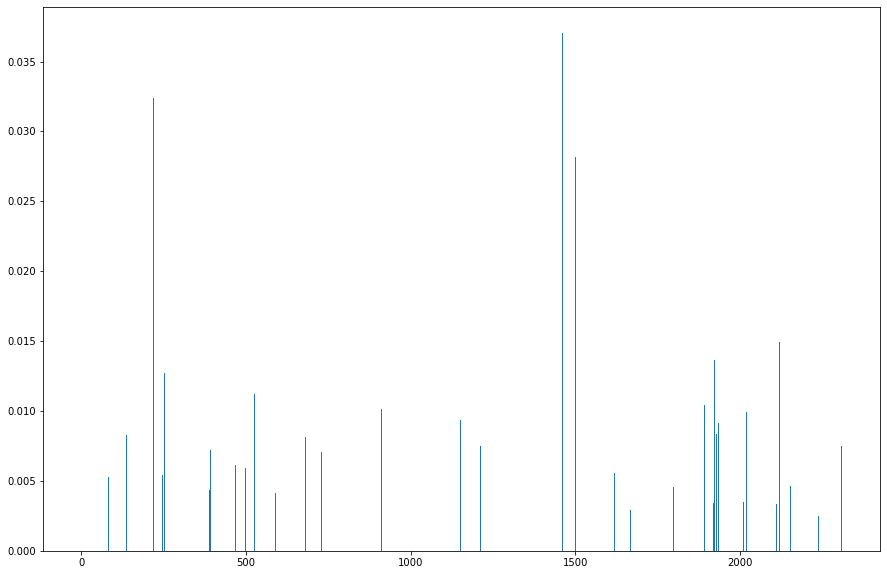

In [24]:
import matplotlib

matplotlib.rcParams['figure.figsize'] = (15, 10)

# chan = 65

plt.bar(range(len(gbm.feature_importances_)), gbm.feature_importances_)
# plt.bar(range(chan*21, (chan+1)*21), gbm.feature_importances_[chan*21:(chan+1)*21])

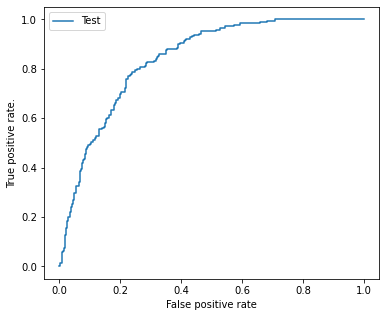

In [13]:
import matplotlib

matplotlib.rcParams['figure.figsize'] = (6, 5)

from sklearn.metrics import roc_curve
                             
def plotROC(tpr, fpr, label=''):
    """
    Plot ROC curve from tpr and fpr.
    """
    plt.plot(fpr, tpr, label=label)
    plt.legend()
    plt.ylabel('True positive rate.')
    plt.xlabel('False positive rate')
    plt.show()
    
# fpr, tpr, thresh = roc_curve(y_test > 3, gbm.predict_proba(X_test)[:, 1])
fpr, tpr, thresh = roc_curve(y_test > 30, model.predict_proba(X_test)[:, 1])

plotROC(tpr, fpr, label='Test')

In [36]:
from sklearn.metrics import roc_auc_score

hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclassova',
    'is_unbalance': True,
    'metric': ['multi_logloss'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}

gbm = lgb.LGBMClassifier(**hyper_params)

gbm.fit(X_train, y_cluster_train,
        eval_set=[(X_test, y_cluster_test)],
        eval_metric='multi_logloss',
        early_stopping_rounds=10)

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.481284 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] fe

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[32]	valid_0's multi_logloss: 1.27201
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[33]	valid_0's multi_logloss: 1.26728
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[34]	valid_0's multi_logloss: 1.26255
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[35]	valid_0's multi_logloss: 1.25794
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[36]	valid_0's multi_logloss: 1.25335
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[37]	valid_0's multi_logloss: 1.24892
[LightGBM] [Warning] N

[66]	valid_0's multi_logloss: 1.13981
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[67]	valid_0's multi_logloss: 1.13658
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[68]	valid_0's multi_logloss: 1.13348
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[69]	valid_0's multi_logloss: 1.13034
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[101]	valid_0's multi_logloss: 1.04564
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[102]	valid_0's multi_logloss: 1.04335
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[103]	valid_0's multi_logloss: 1.04104
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[104]	valid_0's multi_logloss: 1.03883
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[105]	valid_0's multi_logloss: 1.03671
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[137]	valid_0's multi_logloss: 0.975895
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[138]	valid_0's multi_logloss: 0.974196
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[139]	valid_0's multi_logloss: 0.972473
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[140]	valid_0's multi_logloss: 0.970825
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[141]	valid_0's

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[170]	valid_0's multi_logloss: 0.927933
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[171]	valid_0's multi_logloss: 0.92658
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[172]	valid_0's multi_logloss: 0.925277
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[197]	valid_0's multi_logloss: 0.89612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[198]	valid_0's multi_logloss: 0.895156
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[199]	valid_0's multi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[224]	valid_0's multi_logloss: 0.871112
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[225]	valid_0's multi_logloss: 0.870266
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[226]	valid_0's multi_logloss: 0.869428
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[252]	valid_0's multi_logloss: 0.848984
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[253]	valid_0's multi_logloss: 0.848292
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[254]	valid_0's multi_logloss: 0.847578
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[280]	valid_0's multi_logloss: 0.832003
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[281]	valid_0's multi_logloss: 0.831438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[282]	valid_0's multi_logloss: 0.830886
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[305]	valid_0's multi_logloss: 0.81879
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[306]	valid_0's multi_logloss: 0.818286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[307]	valid_0's multi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[327]	valid_0's multi_logloss: 0.809123
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[328]	valid_0's multi_logloss: 0.808714
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[329]	valid_0's multi_logloss: 0.80834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[350]	valid_0's multi_logloss: 0.800369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[351]	valid_0's multi_logloss: 0.800059
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[352]	valid_0's multi_logloss: 0.799697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[377]	valid_0's multi_logloss: 0.791725
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[378]	valid_0's multi_logloss: 0.791458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[379]	valid_0's mult

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[398]	valid_0's multi_logloss: 0.785957
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[399]	valid_0's multi_logloss: 0.785677
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[421]	valid_0's multi_logloss: 0.780557
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[422]	valid_0's multi_logloss: 0.780407
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[423]	valid_0's multi_logloss: 0.780324
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[444]	valid_0's multi_logloss: 0.776805
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[445]	valid_0's multi_logloss: 0.776632
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[446]	valid_0's multi_logloss: 0.776421
[LightGBM] [Warning] No further splits with positive ga

[467]	valid_0's multi_logloss: 0.773761
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[468]	valid_0's multi_logloss: 0.773671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[469]	valid_0's multi_logloss: 0.773618
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[489]	valid_0's multi_logloss: 0.771139
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[490]	valid_0's multi_logloss: 0.771034
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[515]	valid_0's multi_logloss: 0.768853
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[516]	valid_0's multi_logloss: 0.768808
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[517]	valid_0's multi_logloss: 0.768712
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[537]	valid_0's multi_logloss: 0.767588
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[538]	valid_0's multi_logloss: 0.767538
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[557]	valid_0's multi_logloss: 0.766685
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[558]	valid_0's multi_logloss: 0.766645
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[559]	valid_0's mult

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[578]	valid_0's multi_logloss: 0.766396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[579]	valid_0's multi_logloss: 0.766408
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[580]	valid_0's multi_logloss: 0.766508
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

LGBMClassifier(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
               is_unbalance=True, learning_rate=0.005, max_bin=512, max_depth=8,
               metric=['multi_logloss'], n_estimators=1000,
               num_iterations=100000, num_leaves=128, objective='multiclassova',
               task='train', verbose=0)

4 clusters:
[529]	valid_0's multi_logloss: 0.7308
overall ROC: 0.6114203508181352

0 0.6882020297651985
1 0.6417949822155307
2 0.6516599570640372
3 0.52669931283105
4 0.5487454722148599

2 clusters:
[659]	valid_0's multi_logloss: 0.639818
overall ROC: 0.6797746375172959
0 0.693279771753204
1 0.6557134836092929
2 0.6903306571893907

61 F1

In [37]:
roc_auc_score(label_binarize(gbm.predict(X_test), classes=range(3)), \
              label_binarize(y_cluster_test, classes=range(3)))

0.6331538546520535

In [38]:
for i in range(5):
    try:
        print(i, roc_auc_score(gbm.predict(X_test) == i, y_cluster_test == i))
    except:
        print("An exception occurred")

0 0.6923266351457841
1 0.6477988649380403
2 0.5593360638723364
3 0.5938254486399053
4 0.5477207355396342


In [39]:
confusion_matrix(gbm.predict(X_test), y_cluster_test)

array([[1040,  185,   65,  358,   80],
       [ 330,  622,  105,  409,  118],
       [  99,   48,  110,  213,   86],
       [ 471,  159,  215,  870,  208],
       [  80,   60,   65,  163,   81]])

In [40]:
f1_score(gbm.predict(X_test), y_cluster_test, average='weighted')

0.43769318581252065

In [41]:
gbm.feature_importances_.argmax() % 21

15

In [42]:
gbm.feature_importances_.reshape(110, 21).sum(axis=0)

array([15361, 14112, 15101, 14138, 13741, 13323, 14700, 13437, 16194,
       16157, 15631, 15198, 15222, 14936, 14847, 16291, 14007, 14188,
       14070, 15776, 12586])

In [48]:
gbm.feature_importances_.reshape(110, 21).max(axis=0), gbm.feature_importances_.reshape(110, 21).sum(axis=0).argsort(axis=0)

(array([1534,  925, 1181, 1035,  599, 1155, 2196,  575, 2168, 1104, 1195,
        1597,  915, 1400,  914, 2715, 2198,  702,  562, 2396,  761],
       dtype=int32),
 array([20,  5,  7,  4, 16, 18,  1,  3, 17,  6, 14, 13,  2, 11, 12,  0, 10,
        19,  9,  8, 15]))

In [47]:
gbm.feature_importances_.reshape(110, 21).sum(axis=1).argmax(axis=0)

65